In [32]:
import rmtchem 
import timeit
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import imp
imp.reload(rmtchem)
plt.rcParams.update({'font.size': 16, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

In the absence of driving, the steady state is determined by the free energies, Xs=np.exp(-G). In this case, the eigenvalues of the Jacobian are real and negative definite.

50


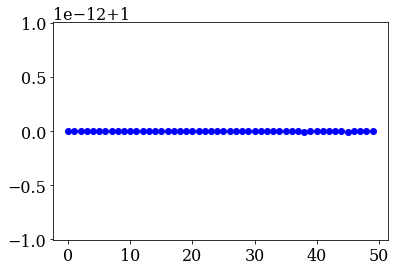

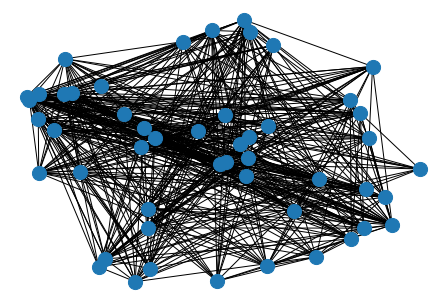

In [33]:
n=50
c=2.0
nr=int(c*n)
seed=31

np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
adj=np.zeros((n,n))
for r in range(2*nr):
    reac=np.where(eta[r]>0)[0]
    prod=np.where(nu[r]>0)[0]
    for i in reac:
        for j in prod:
            adj[i,j]=1
        #if species are both reactants, they affect rates of change of each other
        for j in reac:
            adj[i,j]=1
g=nx.convert_matrix.from_numpy_matrix(adj)

lcc=np.array(list(max(nx.connected_components(g), key=len)))
n=len(lcc)
eta=eta[:,lcc]
nu=nu[:,lcc]
G=G[lcc]

print(n)
X0=np.exp(-G)
XD1=np.zeros(n)
XD2=np.zeros(n)
Xs2=rmtchem.steady(X0,eta,nu,k,XD1,XD2).x
plt.plot(Xs2/X0,'bo')
plt.show()

plt.show()
g=nx.from_numpy_matrix(rmtchem.jac(np.exp(-G),eta,nu,k,XD1,XD2))
nx.draw(g,node_size=200)
plt.savefig('plots/fig0b.pdf')
plt.show()
# Xs,success=rmtchem.integrate(X0,eta,nu,k,XD1,XD2,100,0.1,prog=True)
# plt.plot(Xs)
# plt.show()

-0.19862189800934577


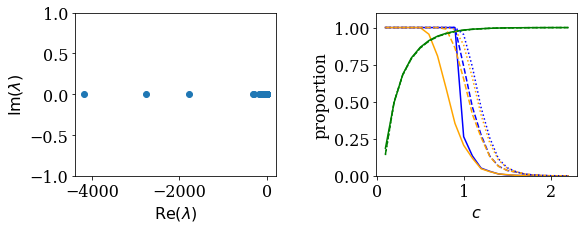

In [34]:
plt.subplots(1,2,figsize=(9,3))
plt.subplot(1,2,1)
n=50
nr=100
eta,nu,k,G=rmtchem.get_network(n,nr)
evals,evecs=np.linalg.eig(rmtchem.jac(np.exp(-G),eta,nu,k,XD1,XD2))
plt.xlabel('$\mathrm{Re}(\lambda)$')
plt.ylabel('$\mathrm{Im}(\lambda)$')
plt.ylim(-1,1)
plt.scatter(x=np.real(evals),y=np.imag(evals))
print(np.max(np.real(evals)))

plt.subplot(1,2,2)
n=200
ns=[100,500,1000]
ls=['-','--',':']
plt.xlabel('$c$')
plt.ylabel("proportion")
plt.ylim(0,1.1)
for i in range(3):
    n=ns[i]
    dat=np.loadtxt('data/sing/'+str(n)+'/scounts.txt')
    plt.plot(dat[:,1],dat[:,2],color='blue',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,3],color='orange',linestyle=ls[i])
    plt.plot(dat[:,1],dat[:,4]/n,color='green',linestyle=ls[i])
    

plt.subplots_adjust(wspace=0.5,hspace=0.0)

plt.savefig("plots/fig1.pdf",transparent=True)
plt.show()

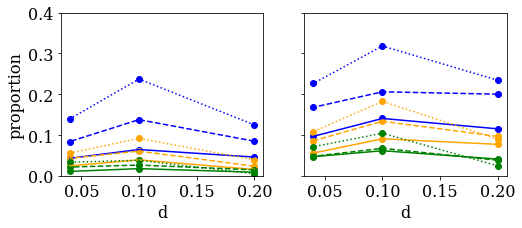

In [35]:
ns=[50,100,200]
ls=["-","--",":"]
cols=["blue","orange","green"]

plt.subplots(1,2,figsize=(8,3))
plt.subplot(1,2,1)
for nind in range(len(ns)):
    n=ns[nind]
    vals=np.loadtxt('data/'+str(n)+'_counts.txt')
    cs=np.unique(vals[:,1])
    for cind in range(len(cs)):
        c=cs[cind]
        inds=np.where(vals[:,1]==c)[0]
        order=np.argsort(vals[inds,2])
        plt.plot(1/vals[inds,2][order],vals[inds,7][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind],linestyle=ls[nind])
        plt.scatter(1/vals[inds,2][order],vals[inds,7][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind])
plt.ylabel('proportion')
plt.ylim(0,0.4)
plt.xlabel('d')

plt.subplot(1,2,2)
for nind in range(len(ns)):
    n=ns[nind]
    vals=np.loadtxt('data/'+str(n)+'_counts.txt')
    cs=np.unique(vals[:,1])
    for cind in range(len(cs)):
        c=cs[cind]
        inds=np.where(vals[:,1]==c)[0]
        order=np.argsort(vals[inds,2])
        plt.plot(1/vals[inds,2][order],vals[inds,8][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind],linestyle=ls[nind])
        plt.scatter(1/vals[inds,2][order],vals[inds,8][order]/(vals[inds,6][order]+vals[inds,7][order]+vals[inds,8][order]),color=cols[cind])
# plt.ylabel('proportion')
plt.ylim(0,0.4)
locs, labels = plt.yticks()
plt.yticks(locs,[])
plt.xlabel('d')

# plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig3.pdf')
plt.show()

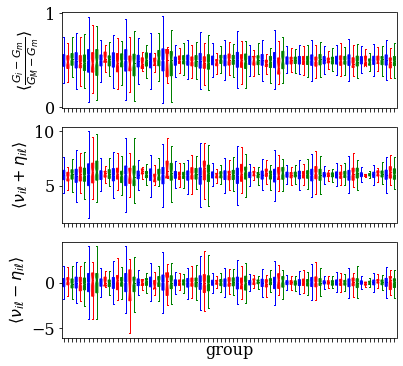

In [36]:
ns=[50,100,200]
cs=[2,2.5,3]
ds=[5,10,25]
c1='blue'
c2='red'
c3='green'


plt.subplots(3,1,figsize=(6,6))

plt.subplot(3,1,1)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append(vals[np.where(vals[:,5]==0.)[0],8]/(n/d))
            plots.append(vals[np.where(vals[:,5]==1.)[0],8]/(n/d))
            plots.append(vals[np.where(vals[:,5]==2.)[0],8]/(n/d))
            
# plt.xlabel('group')
plt.xticks([])
plt.ylabel(r'$\langle \frac{G_i-G_m}{G_M-G_m}\rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)
    
plt.subplot(3,1,2)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],6]+vals[np.where(vals[:,5]==0.)[0],7])/(n/d*c))
            plots.append((vals[np.where(vals[:,5]==1.)[0],6]+vals[np.where(vals[:,5]==1.)[0],7])/(n/d*c))
            plots.append((vals[np.where(vals[:,5]==2.)[0],6]+vals[np.where(vals[:,5]==2.)[0],7])/(n/d*c))
            
# plt.xlabel('group')
plt.xticks([])
plt.ylabel(r'$\langle \nu_{i\ell}+\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)
    
plt.subplot(3,1,3)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],6]-vals[np.where(vals[:,5]==0.)[0],7])/(n/d*c))
            plots.append((vals[np.where(vals[:,5]==1.)[0],6]-vals[np.where(vals[:,5]==1.)[0],7])/(n/d*c))
            plots.append((vals[np.where(vals[:,5]==2.)[0],6]-vals[np.where(vals[:,5]==2.)[0],7])/(n/d*c))
            
plt.xlabel('group')
plt.ylabel(r'$\langle \nu_{i\ell}-\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)

plt.savefig('plots/fig4.pdf')
plt.show()

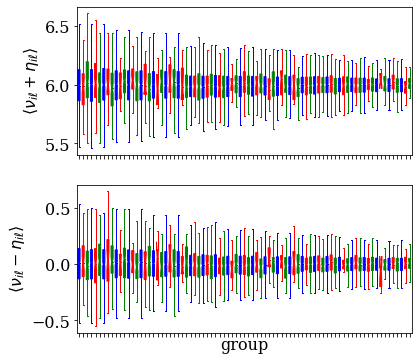

In [37]:
ns=[50,100,200]
cs=[2,2.5,3]
ds=[5,10,25]
c1='blue'
c2='red'
c3='green'


plt.subplots(2,1,figsize=(6,6))

plt.subplot(2,1,1)    
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],10]+vals[np.where(vals[:,5]==0.)[0],11])/(n*c))
            plots.append((vals[np.where(vals[:,5]==1.)[0],10]+vals[np.where(vals[:,5]==1.)[0],11])/(n*c))
            plots.append((vals[np.where(vals[:,5]==2.)[0],10]+vals[np.where(vals[:,5]==2.)[0],11])/(n*c))
            
# plt.xlabel('group')
plt.xticks([])
plt.ylabel(r'$\langle \nu_{i\ell}+\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)
    
plt.subplot(2,1,2)
plt.tick_params(axis='x', which='both', bottom=True,  top=False, labelbottom=False) 
plots=[]
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plots.append((vals[np.where(vals[:,5]==0.)[0],10]-vals[np.where(vals[:,5]==0.)[0],11])/(n*c))
            plots.append((vals[np.where(vals[:,5]==1.)[0],10]-vals[np.where(vals[:,5]==1.)[0],11])/(n*c))
            plots.append((vals[np.where(vals[:,5]==2.)[0],10]-vals[np.where(vals[:,5]==2.)[0],11])/(n*c))
            
plt.xlabel('group')
plt.ylabel(r'$\langle \nu_{i\ell}-\eta_{i\ell} \rangle$')
box1=plt.boxplot(plots,notch=True,patch_artist=True,showfliers=False)
for item in ['boxes', 'fliers', 'medians']:
    plt.setp(box1[item][0::3], color=c1)
    plt.setp(box1[item][1::3], color=c2)
    plt.setp(box1[item][2::3], color=c3)
for item in ['whiskers','caps']:
    plt.setp(box1[item][0::6], color=c1)
    plt.setp(box1[item][1::6], color=c1)
    plt.setp(box1[item][2::6], color=c2)
    plt.setp(box1[item][3::6], color=c2)
    plt.setp(box1[item][4::6], color=c3)
    plt.setp(box1[item][5::6], color=c3)

plt.savefig('plots/fig4.pdf')
plt.show()

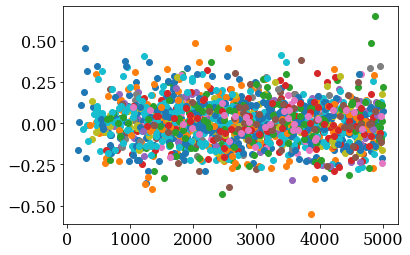

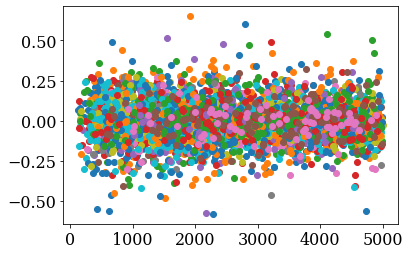

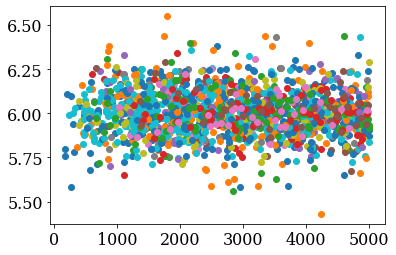

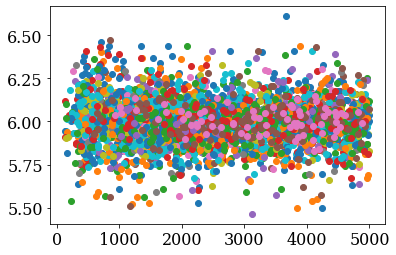

In [38]:
for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==1.)[0],9], (vals[np.where(vals[:,5]==1.)[0],10]-vals[np.where(vals[:,5]==1.)[0],11])/(n*c))
plt.show()

for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==2.)[0],9], (vals[np.where(vals[:,5]==2.)[0],10]-vals[np.where(vals[:,5]==2.)[0],11])/(n*c))
plt.show()

for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==1.)[0],9], (vals[np.where(vals[:,5]==1.)[0],10]+vals[np.where(vals[:,5]==1.)[0],11])/(n*c))
plt.show()

for n in ns:
    for c in cs:
        for d in ds:
            vals=np.loadtxt('data/'+str(n)+'_'+str(c)+'_'+str(d)+'.txt')
            plt.scatter(vals[np.where(vals[:,5]==2.)[0],9], (vals[np.where(vals[:,5]==2.)[0],10]+vals[np.where(vals[:,5]==2.)[0],11])/(n*c))
plt.show()

When we introduce small driving in the same network, the steady state is perturbed and some eigenvalues become complex. We can find the steady state with root finding, and the same steady state is found by numerical integration.

Adiabatically turning on driving then increasing driving amplitude, track the maximum eigenvalues

Saddle-node for iseed=1 around m=140 with 
inds=np.argsort(np.sum(eta+nu,axis=0))[-ndrives:]
n=100 c=2
seed0=1 numseeds=10 ndrives=3
steps=100 d0min=-1 d0max=3
steps2=200 dmin=1 dmax=20!

TODO: make this an quasistatic function, taking d0min, d0max, d1min, d1max

In [12]:
n=100
nr=200
nd=10
seed=49
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
d0=1e3
d1min=1
d1max=100
steps=5000
XD1s,XD2s,nreacs,nprod,dG=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, output=True,stop=False)
m=np.where(np.max(np.real(evals),axis=1)>0)[0][0]
XD1=XD1s[m]*(1.05)
XD2=XD2s[m]
X2,success=rmtchem.integrate(Xs[m], eta, nu, k, XD1,XD2,40,0.1,prog=True)

Integration: 100%|##############################################| Time: 0:01:08


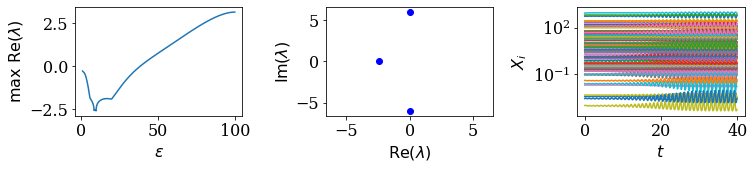

In [13]:
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)

plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
plt.plot(d1s,np.max(np.real(evals),axis=1))

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[m,np.argsort(np.real(evals[m]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[m]),np.imag(evals[m]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel('$X_i$')
plt.xlabel('$t$')
plt.plot(np.arange(0,40,0.1),X2)
plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig2b.pdf')
plt.show()

saddle-node bifurcation!  4637


Integration: 100%|##############################################| Time: 0:00:09


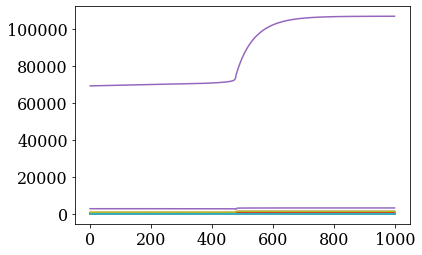

True
step size large (negative X0) 1175
step size large (negative X0) 1176
saddle-node bifurcation!  1177


In [14]:
n=100
nr=200
nd=10
seed=19
np.random.seed(seed)
eta,nu,k,G=rmtchem.get_network(n,nr)
d0=1e3
d1min=1
d1max=100
steps=10000
XD1s,XD2s,nreacs,nprod,dG=rmtchem.get_drive(eta,nu,k,G,d0,d1min,d1max,steps,nd)
X0=np.exp(-G)
Xs,evals,bif=rmtchem.quasistatic(X0, eta, nu, k, XD1s, XD2s, True)
m=len(Xs)-1
XD1=XD1s[m+1]
XD2=XD2s[m+1]
X2,success=rmtchem.integrate(Xs[-1]*(1+np.random.random(size=n)*1e-3), eta, nu, k, XD1,XD2,1000,1,prog=True)
plt.plot(X2)
plt.show()
sol=rmtchem.steady(X2[-1],eta, nu, k, XD1,XD2)
print(sol.success)
X2s,evals2,bif2=rmtchem.quasistatic(sol.x, eta, nu, k, np.flip(XD1s[:m+2],axis=0), np.flip(XD2s[:m+2],axis=0), True)
X3s,evals3,bif3=rmtchem.quasistatic(X2s[0], eta, nu, k, XD1s[m+1:], XD2s[m+1:], True)

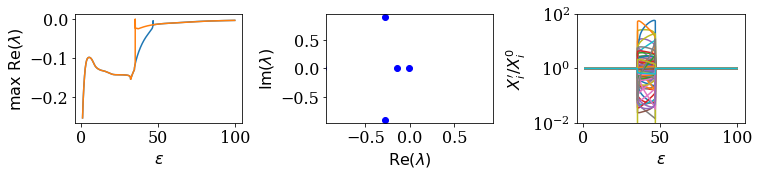

In [17]:
m2=len(X2s)-1
plt.subplots(1,3,figsize=(12,2))
plt.subplot(1,3,1)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{max}~\mathrm{Re}(\lambda)$')
evals4=np.zeros(steps)
evals5=np.zeros(steps)
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
evals4[:m+1]=np.max(np.real(evals),axis=1)
evals4[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m+1:]=np.max(np.real(evals3),axis=1)
evals5[m-m2:m+1]=np.flip(np.max(np.real(evals2),axis=1),axis=0)
evals5[:m-m2]=np.max(np.real(evals),axis=1)[:m-m2]
plt.plot(d1s,evals4)
plt.plot(d1s,evals5)

plt.subplot(1,3,2)
lim=1.1*np.max(np.abs(evals[-1,np.argsort(np.real(evals[-1]))[-3:]]))
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.ylabel(r'$\mathrm{Im}(\lambda)$')
plt.xlabel(r'$\mathrm{Re}(\lambda)$')
plt.plot(np.real(evals[-2]),np.imag(evals[-2]),'bo')

plt.subplot(1,3,3)
plt.yscale('log')
plt.ylabel(r"$X_i'/X_i^0$")
plt.xlabel('$\epsilon$')
X4s=np.zeros((steps,n))
X5s=np.zeros((steps,n))
d1s=np.arange(d1min,d1max,(d1max-d1min)/steps)
X4s[:m+1]=Xs
X4s[m+1:]=X3s
X5s[m+1:]=X3s
X5s[m-m2:m+1]=np.flip(X2s,axis=0)
X5s[:m-m2]=Xs[:m-m2]
plt.yscale('log')
plt.ylim(0.01,100)
plt.plot(d1s,X5s/X4s)

plt.subplots_adjust(wspace=0.5,hspace=0.0)
plt.savefig('plots/fig2a.pdf')
plt.show()